# 1) Leia o arquivo lemonades.csv usando pandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


In [2]:
file_lemonades_csv = pd.read_csv('./Lemonades.csv', sep = ";")
df = file_lemonades_csv
df.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,07/01/2016,Park,97,67,70,90.0,0.25
1,07/02/2016,Park,98,67,72,90.0,0.25
2,07/03/2016,Park,110,77,71,104.0,0.25
3,07/04/2016,Beach,134,99,76,98.0,0.25
4,07/05/2016,Beach,159,118,78,135.0,0.25


# 2) retorne as informações sobre as colunas e as principais estatísticas sobre o dataset

In [3]:
df.describe().round(2)

,Lemon,Orange,Temperature,Leaflets,Price
count,32.00,32.00,32.00,31.00,32.00
mean,116.16,80.00,78.97,108.55,0.35
std,25.82,21.86,4.07,20.12,0.11
min,71.00,42.00,70.00,68.00,0.25
25%,98.00,66.75,77.00,90.00,0.25
50%,113.50,76.50,80.50,108.00,0.35
75%,131.75,95.00,82.00,124.00,0.50
max,176.00,129.00,84.00,158.00,0.50


# 3)Realize a limpeza do dataset:
### - verifique se existe valores nulos
### - remova duplicatas
### - trate os elementos faltantes (interpolação e media)

In [4]:
import datetime

#verificar nulos
print(df.isnull().sum())

#removendo duplicatas
df.drop_duplicates(inplace=True)

# preenchendo Leaflets com a media da coluna
df['Leaflets'].fillna(df.Leaflets.mean(),inplace=True)

## Preenchendo as datas faltantes
df['Date'] = pd.to_datetime(df['Date'])
g = df['Date'].notnull().cumsum()
df['Date'] = df['Date'].ffill() + df['Date'].groupby(g).cumcount().apply(lambda x: datetime.timedelta(days=x))
df.set_index('Date',inplace=True)
df.head(10)

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64


,Location,Lemon,Orange,Temperature,Leaflets,Price
Date,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25
2016-07-02,Park,98,67,72,90.0,0.25
2016-07-03,Park,110,77,71,104.0,0.25
2016-07-04,Beach,134,99,76,98.0,0.25
2016-07-05,Beach,159,118,78,135.0,0.25
2016-07-06,Beach,103,69,82,90.0,0.25
2016-07-07,Beach,143,101,81,135.0,0.25
2016-07-08,Beach,123,86,82,113.0,0.25
2016-07-09,Beach,134,95,80,126.0,0.25


# 4) Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja

In [5]:
df['Sales'] = df['Lemon'] + df['Orange']
df.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales
Date,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25,164
2016-07-02,Park,98,67,72,90.0,0.25,165
2016-07-03,Park,110,77,71,104.0,0.25,187
2016-07-04,Beach,134,99,76,98.0,0.25,233
2016-07-05,Beach,159,118,78,135.0,0.25,277


# 5) Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço)

In [6]:
df['Revenue'] = df['Sales'] * df['Price']
df.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25,164,41.00
2016-07-02,Park,98,67,72,90.0,0.25,165,41.25
2016-07-03,Park,110,77,71,104.0,0.25,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.25,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.25,277,69.25


# 6) retorne o lucro total

In [7]:
df['Revenue'].sum()

2138.0

# 7) escreva uma função que receba dois parâmetros, dataset e temp(int). 
### Se max for 1, ele retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do
### período observado; se -1, retorna a temperatura mínima

In [8]:
def temp_price(df,temp):
    if temp == 1:
        return df['Temperature'].max()
    elif temp == 0:
        return df['Temperature'].mean()
    elif temp == -1:
        return df['Temperature'].min()
    
print('temp max:',temp_price(df,1))
print('temp median: {0:.2f}'.format(temp_price(df,0)))
print('temp min:',temp_price(df,-1))

temp max: 84
temp median: 78.87
temp min: 70


# 8) escreva uma função que receba dois parametros (dataset, localização) e retorne o dataset com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach'


In [9]:
def location_price(df, location):
    aux = df.copy()
    coef = 1.15 if 'Park' in location else 1.1
    aux['Price'] = aux['Price'].apply(lambda x: x * coef)
    return aux

# location: Beach
location_price(df,'Beach').head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.275,164,41.00
2016-07-02,Park,98,67,72,90.0,0.275,165,41.25
2016-07-03,Park,110,77,71,104.0,0.275,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.275,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.275,277,69.25


In [10]:
# location: Park
location_price(df,'Park').head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.2875,164,41.00
2016-07-02,Park,98,67,72,90.0,0.2875,165,41.25
2016-07-03,Park,110,77,71,104.0,0.2875,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.2875,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.2875,277,69.25


# 9) escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado de acordo com rank


In [11]:
def temp_rank(df):
    df.sort_values(by='Temperature', ascending=False, inplace=True)
    df['temp_rank'] = df.Temperature.notnull().cumsum()
    return df
temp_rank(df).head(10)

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue,temp_rank
Date,,,,,,,,,
2016-07-25,Park,156,113,84,135.0,0.50,269,134.50,1
2016-07-12,Beach,130,95,84,99.0,0.25,225,56.25,2
2016-07-26,Park,176,129,83,158.0,0.35,305,106.75,3
2016-07-11,Beach,162,120,83,135.0,0.25,282,70.50,4
2016-07-10,Beach,140,98,82,131.0,0.25,238,59.50,5
2016-07-24,Park,121,82,82,117.0,0.50,203,101.50,6
2016-07-28,Park,96,63,82,90.0,0.35,159,55.65,7
2016-07-31,Beach,76,47,82,68.0,0.35,123,43.05,8
2016-07-08,Beach,123,86,82,113.0,0.25,209,52.25,9


# 10) Imprima um gráfico de linha que retorne o lucro ao longo do tempo

In [12]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df.sort_index(inplace=True)
xaxis = df.iloc[:,0:0]
yaxis = df.iloc[:,7:8]

ax = plt.gca()
xaxis = mdates.date2num(xaxis)
hfmt = mdates.DateFormatter('%m\n%d')
ax.xaxis.set_major_formatter(hfmt)

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.plot(yaxis)
plt.show()

<Figure size 640x480 with 1 Axes>

# 11) crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados?

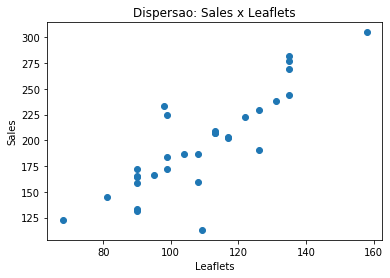

In [13]:
leaflets = df.iloc[:,4:5]
leaflets.reset_index(drop=True,inplace=True)

sales = df.iloc[:,6:7]
sales.reset_index(drop=True,inplace=True)

plt.scatter(leaflets,sales)
plt.xlabel('Leaflets')
plt.ylabel('Sales')
plt.title('Dispersao: Sales x Leaflets')
plt.show()

In [35]:
import numpy as np
from scipy import stats as sts

leaflets_list = leaflets['Leaflets'].tolist()
sales_list = sales['Sales'].tolist()

print('pearson coef: {0:.2f}'.format(sts.pearsonr(leaflets_list,sales_list)[0]))
print('\nVisualmente percebe-se possível relação linear entre panfletagem e vendas e de fato o coeficiente de correlação de Pearson indica que há uma correlacao forte entre as variáveis aleatórias (p > 0.8)')

pearson coef: 0.84

Visualmente percebe-se possível relação linear entre panfletagem e vendas e de fato o coeficiente de correlação de Pearson indica que há uma correlacao forte entre as variáveis aleatórias (p > 0.8)


# 12) crie um histograma que mostre o lucro (revenue) com 10 bins

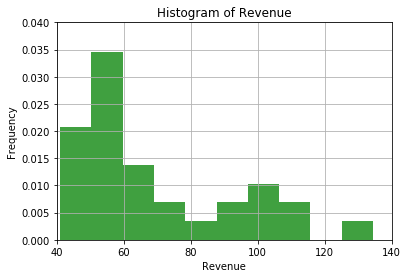

In [40]:
revenues = df['Revenue'].copy()

revenues.reset_index(drop=True,inplace=True)

plt.hist(revenues, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue')
plt.axis([40, 140, 0, 0.04])
plt.grid(True)
plt.show()

# 13) crie um gráfico de linha que compute o lucro por tipo de fruta ao longo do tempo.

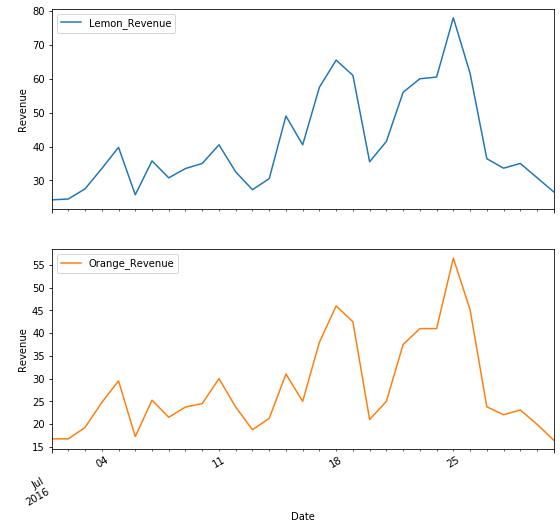

In [36]:
df_new = df.copy()

df_new['Lemon_Revenue'] = df_new.Lemon * df_new.Price
df_new['Orange_Revenue'] = df_new.Orange * df_new.Price

columns_plot = ['Lemon_Revenue', 'Orange_Revenue']
axis = df_new[columns_plot].plot(subplots=True, figsize=(9, 9))
for ax in axis:
    ax.set_ylabel('Revenue')
    ax.set_xlabel('Date')    

# 14) usando regressão linear, prediga vendas a partir de:
- temperature
- leaflets
- price
- retorne o gráfico com a reta ajustada aos dados para cada variável

In [74]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

features = ['Temperature','Leaflets','Price']
meta = 'Sales'

# Usamos 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(df[features], df[meta], test_size=0.3, random_state=42)

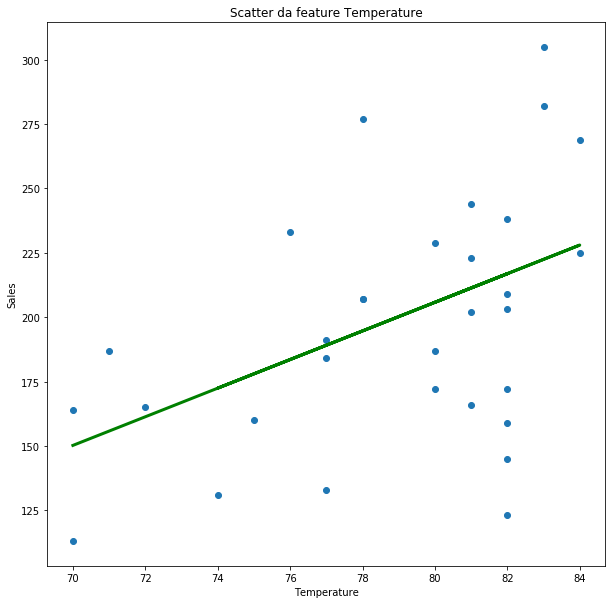

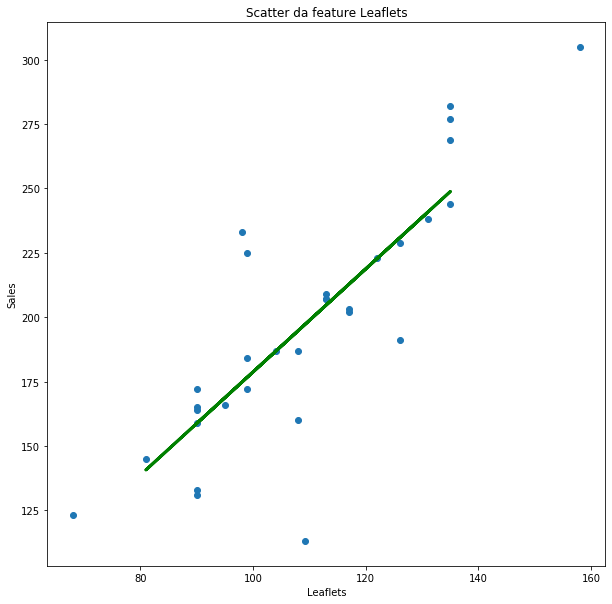

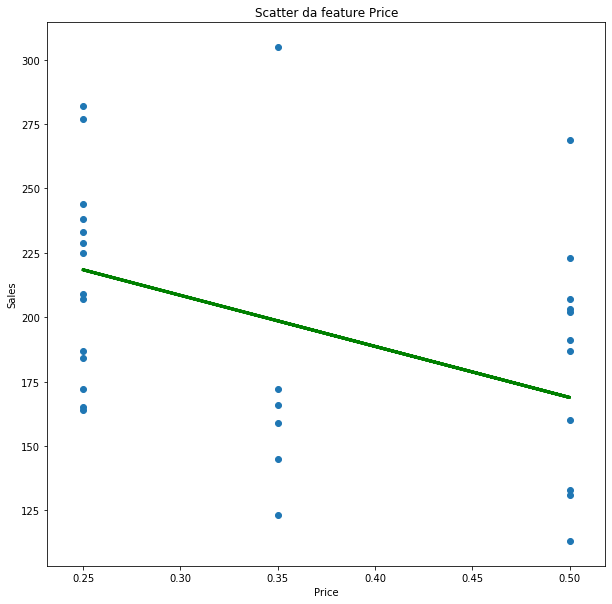

In [83]:
for feature in features:
    reg = linear_model.LinearRegression().fit(X_train[feature].to_frame(), y_train)
    y_predict = reg.predict(X_test[feature].to_frame())

    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel(f'{meta}')
    ax.set_title(f'Scatter da feature {feature}')
    ax.scatter(df[feature], df[meta])
    ax.plot(X_test[feature], y_predict, color='green', linewidth=3)
    


# 15) usando regressão linear, prediga vendas a partir das três variáveis juntas

In [87]:
reg = linear_model.LinearRegression().fit(X_train, y_train)
y_predict = reg.predict(X_test)

In [174]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_predict)
r2 = metrics.r2_score(y_test, y_predict)
print('MSE', mse) 
print('R2', r2, f'As variáveis conseguem explicar {r2.round(2) * 100}% da variabilidade do modelo.') 

MSE 5.884942658307155
R2 0.7301985463623364 As variáveis conseguem explicar 73.0% da variabilidade do modelo.


# 16) Usando a Regressão Linear implementada em sala como modelo, generalize o algoritmo para que ele possa ser usado para regressão multivariada

In [157]:
class LinearRegression():
    
    def __init__(self, num_iterations=1000, alpha=0.1):
        self.__num_iterations = num_iterations
        self.__alpha = alpha
        self.__theta = None
        self.__optimal_error = 0.01
        self.__num_features = 0
    
    def __cost_function(self, X, y, theta):
        m = len(y) #número de amostras
        J = 0 # custo
        
        for i in range(m):
            # Only one feature
            # J = J + np.power((theta[0] + theta[1] * X[i][1] - y[i]), 2)
            J = J + np.power((X[i].dot(self.__theta) - y[i]), 2)
        
        return J * (1 / (2 * m))
    
    # def gradient_descent(self, X, y, theta, alfa, num_iter):
    def __gradient_descent(self, X, y):
        
        m = len(y)
        n = self.__num_features
        J_history = np.zeros(self.__num_iterations)
        
        #temp0 = 0
        #temp1 = 0
        
        temp = np.zeros(n)
        
        #for k in range(num_iter):
        
        k = 0 
        
        cost = 1000
        
        while (k < self.__num_iterations and cost > self.__optimal_error):
            for i in range(m):
                # Only one feature
                #temp0 = temp0 - alpha * (1/m * (theta[0] + theta[1] * X[1][i] - y[i]))
                #temp1 = temp1 - alpha * (1/m * (theta[0] + theta[1] * X[1][i] - y[i]))*X[1][i]
                #theta[0] = temp0
                #theta[1] = temp1

                for j in range(n):
                    temp[j] = temp[j] - self.__alpha * (1/m * (X[i].dot(self.__theta) - y[i])) * X[i][j]
                
                self.__theta = temp.copy()
            
            cost = self.__cost_function(X, y, self.__theta)
            J_history[k] = cost
            
            k+=1

        return self.__theta, J_history
    
    def __get_num_features(self, df):
        num_features = 0
        try:
            num_features = df.shape[1]
        except IndexError:
            num_features = 1
        return num_features
    
    def fit(self, X, y):
        self.__num_features = self.__get_num_features(X) + 1 # Obtemos o tamanho das colunas + 1 (para generalizar o theta[0] (intercept))
        self.__theta = np.zeros(self.__num_features)
        X_0 = np.ones(X.shape[0])
        X_train = np.column_stack((X_0, X))
        return self.__gradient_descent(X_train, y)
        
    def predict(self, X):
        X_0 = np.ones(X.shape[0])
        X_predict = np.column_stack((X_0, X))
        return X_predict.dot(self.__theta)
    
   

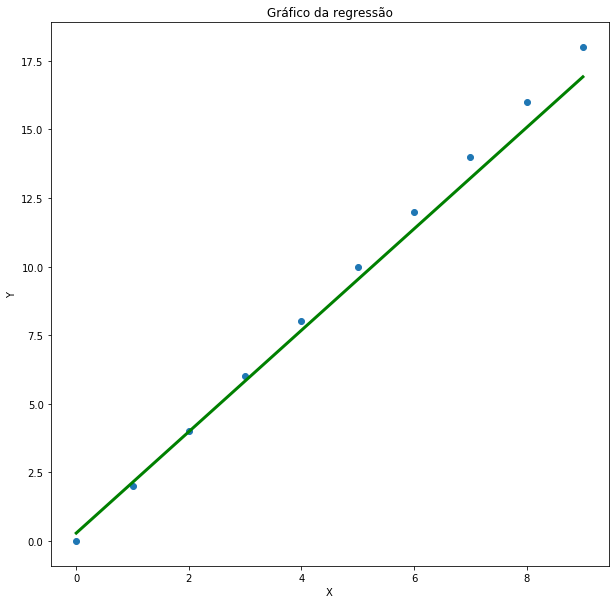

In [158]:
lr = LinearRegression(num_iterations=100, alpha=0.001)
X = np.arange(10)
y = X * 2 # y = 2X 

lr.fit(X, y)
y_predict = lr.predict(X)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Gráfico da regressão')
ax.scatter(X, y)
ax.plot(X, y_predict, color='green', linewidth=3)

# 17) aplique o algoritmo implementado no conjunto de dados consumo cerveja usando as mesmas features para treinamento. Compare os resultados que você obteve com os resultados obtidos através da Scikit Learning

In [159]:
df_beer = pd.read_csv('./Consumo_cerveja.csv',nrows=365,delimiter=';')
df_beer = df_beer.rename(columns={'Temperatura Media (C)':'meanTemp','Temperatura Minima (C)':'minTemp','Temperatura Maxima (C)':'maxTemp',
                       'Precipitacao (mm)':'precip','Final de Semana':'weekend','Consumo de cerveja (litros)':'consumo'})
df_beer.head()

,Data,meanTemp,minTemp,maxTemp,precip,weekend,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [160]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

feature_col = ['maxTemp','precip','weekend']
meta = 'consumo'
# Usamos 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(df_beer[feature_col], df_beer[meta], test_size=0.3, random_state=42)


In [175]:
X = X_train.values
y = y_train.values
lm = LinearRegression(num_iterations=1500, alpha=0.01)
lm.fit(X, y)
y_predict = lm.predict(X_test.values)

lm_skit = linear_model.LinearRegression()
lm_skit.fit(X,y)
y_predict_skit = lm_skit.predict(X_test.values)


from sklearn import metrics
mse_skit = metrics.mean_squared_error(y_predict_skit, y_test)
print('MSE entre a regrassão skitlearn e a base de teste', mse_skit)

mse = metrics.mean_squared_error(y_predict, y_test)
print('MSE entre a regressão implementada em aula e a base de teste', mse)

MSE entre a regrassão skitlearn e a base de teste 5.480853459612661
MSE entre a regressão implementada em aula e a base de teste 5.884942658307155
